In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip "UCI HAR Dataset.zip"


--2025-04-24 12:27:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [               <=>  ]  58.17M  17.2MB/s    in 4.7s    

2025-04-24 12:27:15 (12.4 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

In [3]:
import numpy as np
import pandas as pd

# Load train and test sets
def load_X(folder_path):
    return np.array([pd.read_csv(folder_path + f, delim_whitespace=True, header=None).values
                     for f in sorted(os.listdir(folder_path))])

def load_y(file_path):
    return pd.read_csv(file_path, header=None)[0].values - 1  # labels from 0

import os
X_train = load_X('UCI HAR Dataset/train/Inertial Signals/')
X_test = load_X('UCI HAR Dataset/test/Inertial Signals/')
y_train = load_y('UCI HAR Dataset/train/y_train.txt')
y_test = load_y('UCI HAR Dataset/test/y_test.txt')


<ipython-input-3-b3c5a9416389>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return np.array([pd.read_csv(folder_path + f, delim_whitespace=True, header=None).values
<ipython-input-3-b3c5a9416389>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return np.array([pd.read_csv(folder_path + f, delim_whitespace=True, header=None).values
<ipython-input-3-b3c5a9416389>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return np.array([pd.read_csv(folder_path + f, delim_whitespace=True, header=None).values
<ipython-input-3-b3c5a9416389>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return np.array([pd.r

In [4]:
X_train = np.transpose(X_train, (1, 2, 0))  # (n_samples, timesteps, features)
X_test = np.transpose(X_test, (1, 2, 0))

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Shape:", X_train.shape, y_train.shape)


Shape: (7352, 128, 9) (7352, 6)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop])


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3856 - loss: 1.4857 - val_accuracy: 0.6309 - val_loss: 0.9881
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6158 - loss: 0.8768 - val_accuracy: 0.6778 - val_loss: 0.7375
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6358 - loss: 0.8273 - val_accuracy: 0.7009 - val_loss: 0.7935
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7228 - loss: 0.6492 - val_accuracy: 0.7641 - val_loss: 0.6741
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8287 - loss: 0.4758 - val_accuracy: 0.7661 - val_loss: 0.6943
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8280 - loss: 0.4620 - val_accuracy: 0.8423 - val_loss: 0.5544
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8783 - loss: 0.3511 - val_accuracy: 0.8702 - val_loss: 0.4851
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9258 - loss: 0.2463 - val_accuracy: 0.8892 - v

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report
print(classification_report(y_true, y_pred_classes))


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       496
           1       0.96      0.96      0.96       471
           2       0.97      0.98      0.98       420
           3       0.85      0.75      0.80       491
           4       0.81      0.89      0.85       532
           5       0.99      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



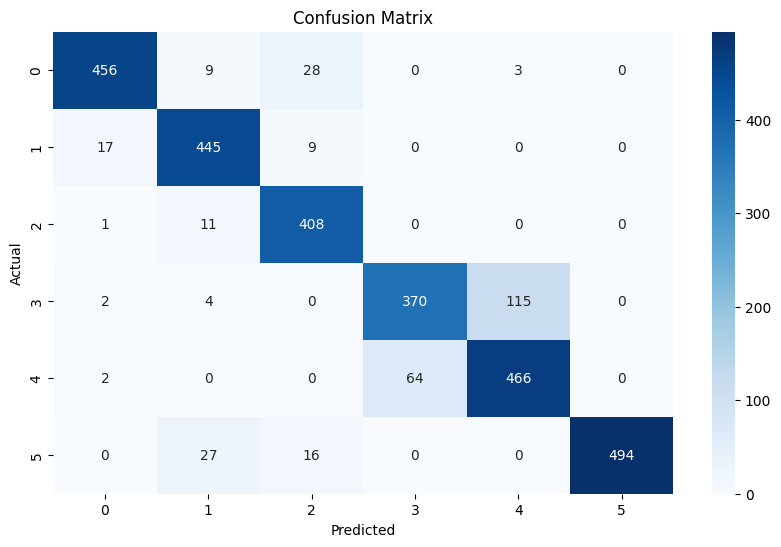

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()